# Transformação Matricial de Rotação
### Prof. Dr. Reginaldo Leão (reginaldo.junior@ifmg.edu.br)
**Todos os direitos reservados segundo os termos da licença MIT

## 1. Fundamentos Algébricos.

Suponha um vetor unitário $\vec{v}$, isto é, de norma $||\vec{v}|| = 1$, orientado no ciclo trigonométrico conforme a imagem abaixo. 

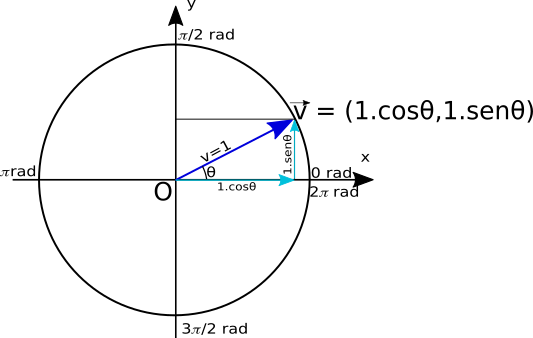

Agora suponha que o vetor sofrerá uma rotação em torno de $O$ por um ângulo $\theta$ dado em radianos, conforme o novo estado mostrado na imagem abaixo. Simultaneamente, vamos generalizar a extensão do vetor para qualquer comprimento $r$.
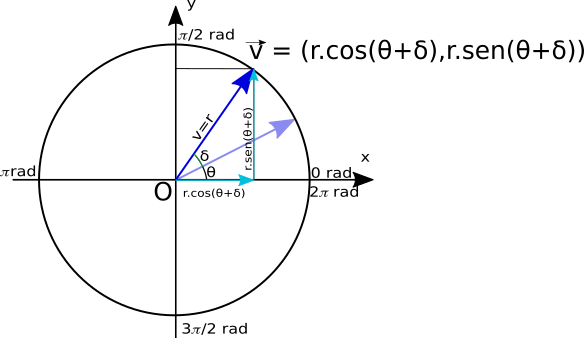

Se $\vec{v}$ for escrito como:

$$
\vec{v} = \left[
    \begin{array}{c}
    r.cos(\theta) \\
    r.sen(\theta) \\
    \end{array}
\right]
$$

e o estado rotacionado, digamos $\vec{v'}$, escrito como: 

$$
\vec{v'} = \left[
    \begin{array}{c}
    r .\cdot cos(\theta + \delta) \\
    r . \cdot sen(\theta + \delta)  \\
    \end{array}
\right]
$$

então deve haver uma matriz $M$, que se multiplicada por $\vec{v}$, resulta em $\vec{v'}$, ou seja:
$$
    \vec{v'} = M \cdot \vec{v}
$$

Existem várias formas de se determinar $M$, seguiremos pela menos rigorosa, porém mais acessível e suficiente para a demonstração. 

#### Para $v$
temos que suas compontens $x$ e $y$, já demonstradas nas imagens são $x = r cos(\theta)$ e $y = r sen(\theta)$.

#### Para $v'$
temos que suas componetes $x'$ e $y'$, também já demonstradas nas imagens são $x' = r cos(\theta + \delta)$ e $y' = r sen(\theta + \delta)$.

Feitas tais considerações e recorrendo às [identidades trigonométricas](https://pt.wikipedia.org/wiki/Identidade_trigonom%C3%A9trica) $sen(a+b) = sen(a) cos(b) + cos(a) sen(b)$ e $cos(a+b) = cos(a) cos(b) - sen(a) sen(b)$, pode-se escrever $x' = r cos(\theta + \delta)$ e $y' = r sen(\theta + \delta)$, segundo essas identidades.

$$
x' = r cos(\theta + \delta) = r cos(\theta) cos(\delta) - r sen(\theta) sen(\delta)
$$

onde $r cos(\theta)$ e $r sen(\theta)$ são $x$ e $y$ respectivamente, ou seja:

$$
x' = x cos(\delta) - y sen(\delta)
$$

O mesmo ocorre $y'$.

$$
y' = r sen(\theta + \delta) = r sen(\theta)cos(\delta) + r cos(\theta)sen(\delta)
$$

$$
y' = x cos(\delta) + y sen(\delta)
$$

Agora pode-se compor um sistema linear com as equações demonstradas. 



In [28]:
import numpy as np

def convert_graus_rads(ang):
    """
        Recebe um ângulo em graus como argumento e o transforma em radianos utilizando
        a relação matemática:
        
            ang_rad = ang * PI / 180
            
            A relação acima pode ser obtida por uma regra de três simples:
            
            rads                 graus
            --------------------------
             PI                   180
             ang_rad              ang
        
             
        Simultaneamente, printa uma lista do seno e cosseno do ângulo passado. 
        
        Parâmetros:
        ang - float ou int: ângulo passado para a conversão em radianos e cálculos
        trigonométricos
        
        Retorno:
        float - ângulo passado em radianos. 
    """
    ang_rad = ang * np.pi / 180
    print(
        f"cos{ang}° = {np.round(np.cos(ang_rad),3)}\n" + 
        f"sen{ang}° = {np.round(np.sin(ang_rad),3)}\n" +
        f"-cos{ang}° = {np.round(-np.cos(ang_rad),3)}\n" +
        f"-sin{ang}° = {np.round(-np.sin(ang_rad),3)}\n"
    )
    
    return ang_rad

rot_ang = convert_graus_rads(30) # Ângulo em graus 

cos30° = 0.866
sen30° = 0.5
-cos30° = -0.866
-sin30° = -0.5



In [32]:
v = np.array([[1],[0]])
v_l = np.array([[np.cos(rot_ang)],[np.sin(rot_ang)]])
np.inner(v, v_l)

array([[0.8660254, 0.5      ],
       [0.       , 0.       ]])

Após termos inicializados os vetores, obtemos $M$ (`m_rot`) conforme a equação $M = \vec{v'} \times \vec{v}^{-1}$ já mencionada.

In [10]:
m_rot = np.inner(v_l, v)
m_rot

array([[-1.0000000e+00, -1.0000000e+00],
       [ 1.2246468e-16,  1.2246468e-16]])

In [12]:
np.linalg.det(v)

LinAlgError: Last 2 dimensions of the array must be square